In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

In [2]:
#상품 대분류 ex)칸쵸 = 과자, 칭다오 = 알콜 

departments= pd.read_csv("departments.csv")

print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [3]:
#상품소분류 
aisles = pd.read_csv("aisles.csv")

print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
#order_dow - 요일 
orders = pd.read_csv("orders.csv")

print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
orders["order_dow(day)"] = orders["order_dow"].replace(0, "Saturday")\
                                                     .replace(1, "Sunday")\
                                                     .replace(2, "Monday")\
                                                    .replace(3, "Tuesday")\
                                                     .replace(4, "Wednesday")\
                                                     .replace(5, "Thursday")\
                                                     .replace(6, "Friday")

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dow(day)
0,2539329,1,prior,1,2,8,NaN,Monday
1,2398795,1,prior,2,3,7,15.0,Tuesday
2,473747,1,prior,3,3,12,21.0,Tuesday
3,2254736,1,prior,4,4,7,29.0,Wednesday
4,431534,1,prior,5,4,15,28.0,Wednesday


In [6]:
#eval_set - test: 다음 구매를 예측해야할 고객 수 

orders["eval_set"].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [7]:
# orders["eval_set"].loc  - 트레인만 추출하기 

test = orders.loc[orders["eval_set"] == "test"]
print(test.shape)
test.head()

(75000, 8)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dow(day)
38,2774568,3,test,13,5,15,11.0,Thursday
44,329954,4,test,6,3,12,30.0,Tuesday
53,1528013,6,test,4,3,16,22.0,Tuesday
96,1376945,11,test,8,6,11,8.0,Friday
102,1356845,12,test,6,1,20,30.0,Sunday


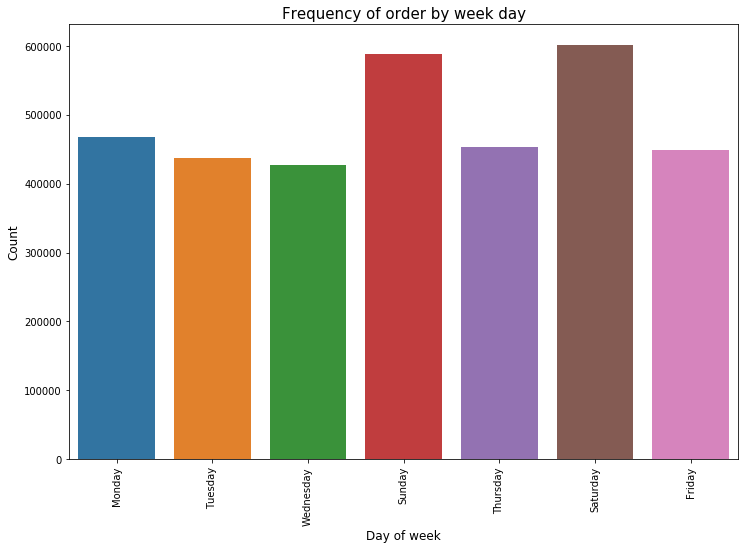

In [8]:
#요일별 
#0을 토요일이라 추정 

plt.figure(figsize=(12,8))
sns.countplot(x="order_dow(day)", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

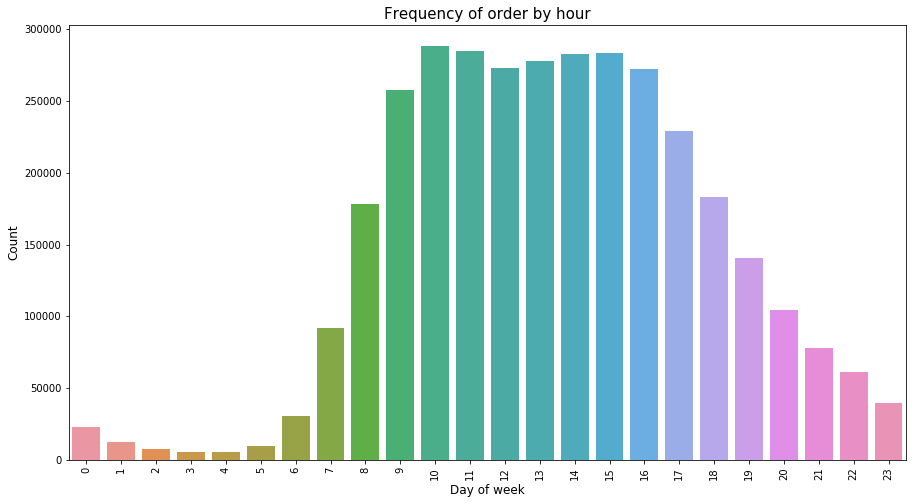

In [9]:
#시간별 주문량
#아침 9시부터 저녁 7시까지 주문량이 많음-저녁 7시는 주문량이 1만5천건에 미치지 못하지만. 
#오전 10시에 주문량이 근소한 차이로 많다는 것을 알 수 있음 -아마 쿠팡이나 마켓컬리처럼 오늘 몇시까지 주문하면 익일 몇시까지 배송-이런 시스템일수도?

plt.figure(figsize=(15,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour", fontsize=15)
plt.show()

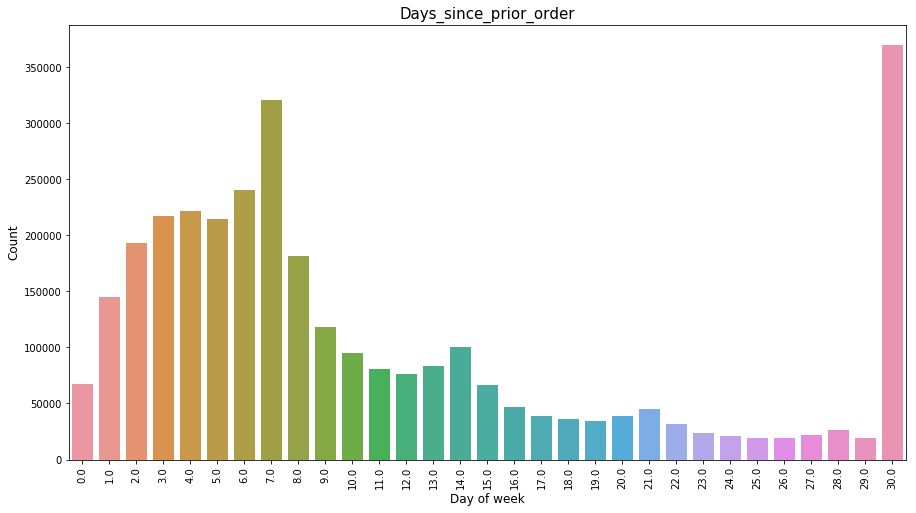

In [10]:
#이전 주문일로부터 다시 재주문까지 걸린 시간 
#30일과 7일이 가장 많음(즉 월간, 주간단위로 재주문하는 것을 알 수 있음)

plt.figure(figsize=(15,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Days_since_prior_order", fontsize=15)
plt.show()

In [11]:
#상품상세명과 소분류, 대분류. 
#aisle-가 소분류, department-대분류(ex) 칭다오(product_name), 맥주(ailse), 알콜(department)

products = pd.read_csv("products.csv")

print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
#이걸로 분석해보아도 될 것 같다. 
#prior에서 train date다! 

train = pd.read_csv("order_products__train.csv")

print(train.shape)
train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
#상품과 train데이터를 병합. left로 병합한 경우, 데이터 갯수는 1395182. 
#모집단이 충분한 것 같아서 inner로 병합 

train_pro= pd.merge(products, train, on = "product_id", how = 'inner')

print(train_pro.shape)
train_pro.head()

(1384617, 7)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1


In [14]:
#train-상품-에 소분류 병합

train_depart = pd.merge(train_pro, departments, on = "department_id", how = 'inner')

print(train_depart.shape)
train_depart.head()

(1384617, 8)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,department
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,snacks
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,snacks
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,snacks
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,snacks
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,snacks


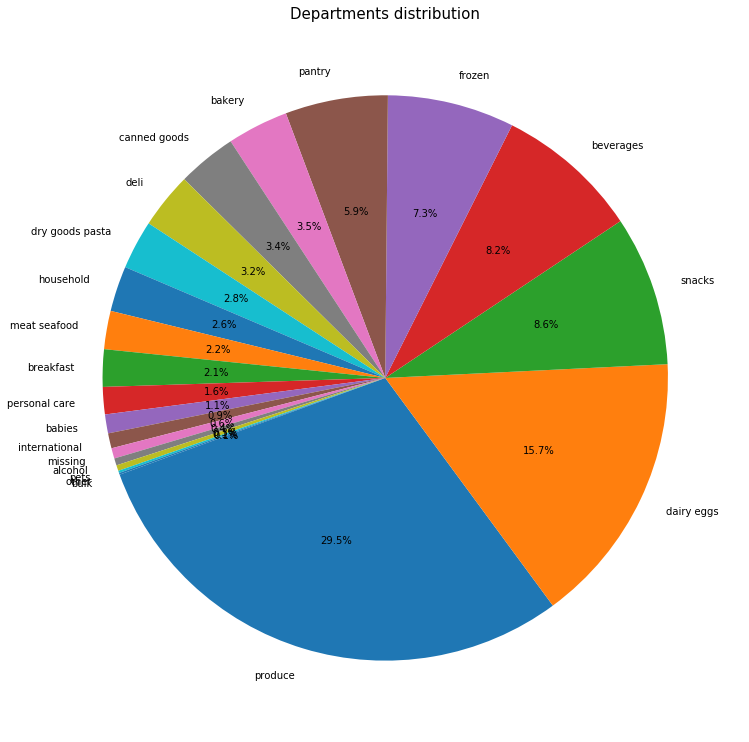

In [15]:
#대략적인 크기만 파악. 

plt.figure(figsize=(13,13))
temp_series = train_depart['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [16]:
#재구매를 했는데(1), 가장 많은 부분(department)는? 

group_re_depart = train_depart.groupby(["department"])["reordered"].aggregate("mean").reset_index()
group_re_depart

,department,reordered
0,alcohol,0.606824
1,babies,0.541062
2,bakery,0.634211
3,beverages,0.658155
4,breakfast,0.571661
5,bulk,0.578366
6,canned goods,0.486805
7,dairy eggs,0.674966
8,deli,0.617891
9,dry goods pasta,0.487821


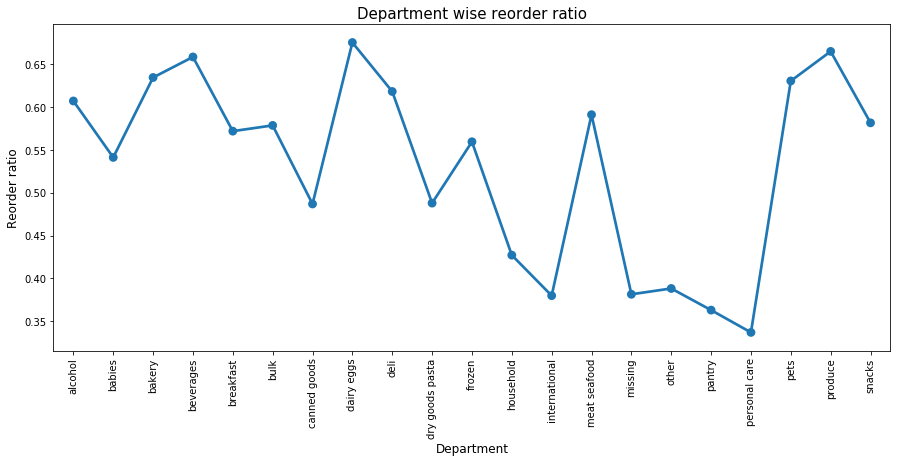

In [17]:
#위에 그룹바이를 시각화
#1위 유제품계란(dairy eggs), 2위 produce, 3위 beverages 

plt.figure(figsize=(15,6))
sns.pointplot(group_re_depart['department'].values, group_re_depart['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
all_train = pd.merge(train_depart, aisles, on = "aisle_id", how = 'inner')

print(all_train.shape)
all_train.head()

(1384617, 9)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,snacks,cookies cakes
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,snacks,cookies cakes
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,snacks,cookies cakes
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,snacks,cookies cakes
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,snacks,cookies cakes


In [19]:
#order와 train 병합 
#eval_set에 train만 남는다. 
#모수가 충분하니 train_order와 all_train 두개 번갈아가면서 비교해되 될 듯(혹은 둘 중하나만) 
train_order = pd.merge(all_train, orders, on = "order_id", how = 'left')

print(train_order.shape)
train_order.head()

(1384617, 16)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dow(day)
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,snacks,cookies cakes,1540,train,29,1,1,8.0,Sunday
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,snacks,cookies cakes,194636,train,5,2,14,11.0,Monday
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,snacks,cookies cakes,751,train,7,2,6,30.0,Monday
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,snacks,cookies cakes,142585,train,6,1,13,30.0,Sunday
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,snacks,cookies cakes,57938,train,49,4,11,21.0,Wednesday


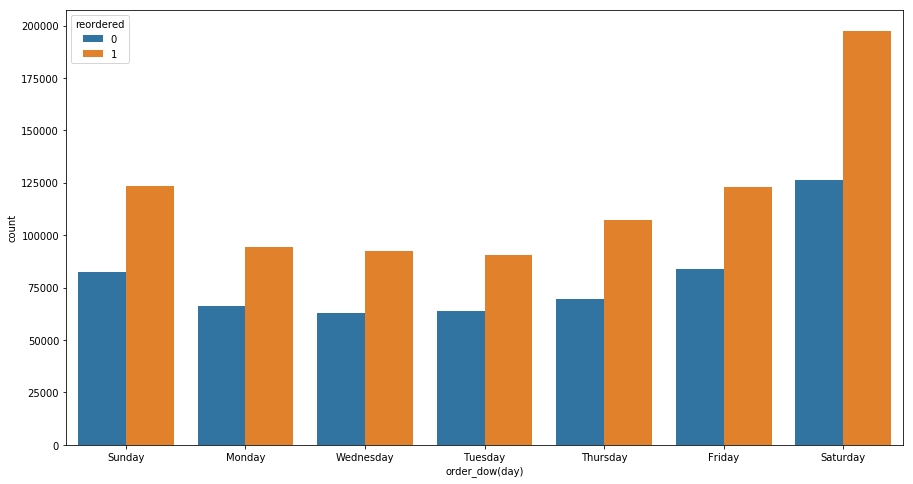

In [20]:
#재주문한사람들의 요일. 
#기본적으로 재구매가 높고, 토요일이 압도적으로 높음. 

plt.figure(figsize=(15,8))
sns.countplot(x="order_dow(day)", hue = "reordered", data=train_order)
plt.show()

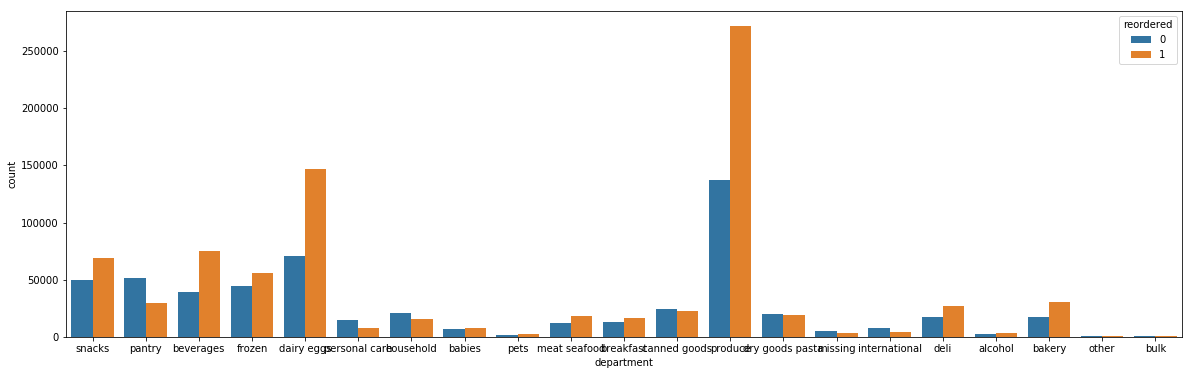

In [21]:
#분야별 재구매 비율 
plt.figure(figsize=(20,6))
sns.countplot(x="department", hue = "reordered", data=train_order)
plt.show()

In [22]:
#분야별 재구매 비율 
depart_reorder = pd.pivot_table(train_order, 
               index = "department",
              values = "reordered",
               aggfunc = ['sum','count', 'mean'],
               margins = True,
              margins_name= "total")

depart_reorder

,sum,count,mean
,reordered,reordered,reordered
department,,,
alcohol,3397,5598,0.606824
babies,8084,14941,0.541062
bakery,30692,48394,0.634211
beverages,75060,114046,0.658155
breakfast,16864,29500,0.571661
bulk,786,1359,0.578366
canned goods,22782,46799,0.486805
dairy eggs,146502,217051,0.674966


In [23]:
depart_reorder.columns = ['sum', 'count', 'mean']

depart_reorder.sort_values(by="mean", ascending = False)

,sum,count,mean
department,,,
dairy eggs,146502,217051,0.674966
produce,271886,409087,0.664617
beverages,75060,114046,0.658155
bakery,30692,48394,0.634211
pets,2834,4497,0.630198
deli,27367,44291,0.617891
alcohol,3397,5598,0.606824
total,828824,1384617,0.598594
meat seafood,17907,30307,0.590854


In [24]:
#aisle과 재구매

aisle_reorder = pd.pivot_table(train_order, 
               index = "aisle",
              values = "reordered",
               aggfunc = ['sum','count', 'mean'],
               margins = True,
              margins_name= "total")

aisle_reorder.head()

,sum,count,mean
,reordered,reordered,reordered
aisle,,,
air fresheners candles,365,1067,0.342081
asian foods,2485,7007,0.354645
baby accessories,173,306,0.565359
baby bath body care,88,328,0.268293
baby food formula,7294,13198,0.552659


In [25]:
aisle_reorder.columns = ['sum', 'count', 'mean']
aisle_reorder = aisle_reorder.sort_values(by="mean", ascending = False)
aisle_reorder.head(20)

,sum,count,mean
aisle,,,
milk,25864,32644,0.792305
water seltzer sparkling water,27011,36617,0.737663
fresh fruits,110782,150473,0.736225
eggs,14488,19875,0.728956
packaged produce,9657,13460,0.717459
cream,8510,12356,0.688734
soy lactosefree,18046,26240,0.687729
yogurt,37939,55240,0.686803
white wines,744,1088,0.683824


In [26]:
#product_name와 재구매

product_reorder = pd.pivot_table(train_order, 
               index = "product_name",
              values = "reordered",
               aggfunc = ['sum','count'])

product_reorder.head()

,sum,count
,reordered,reordered
product_name,,
#2 Coffee Filters,8,22
#2 Cone White Coffee Filters,0,1
#2 Mechanical Pencils,0,1
#4 Natural Brown Coffee Filters,1,6
& Go! Hazelnut Spread + Pretzel Sticks,6,10


In [27]:
#자세히 보면 orgnic이 상위 20위 안에 든다. 

product_reorder.columns = ['sum', 'count']
product_reorder = product_reorder.sort_values(by="count", ascending = False)
top_product_reorder = product_reorder.head(30)

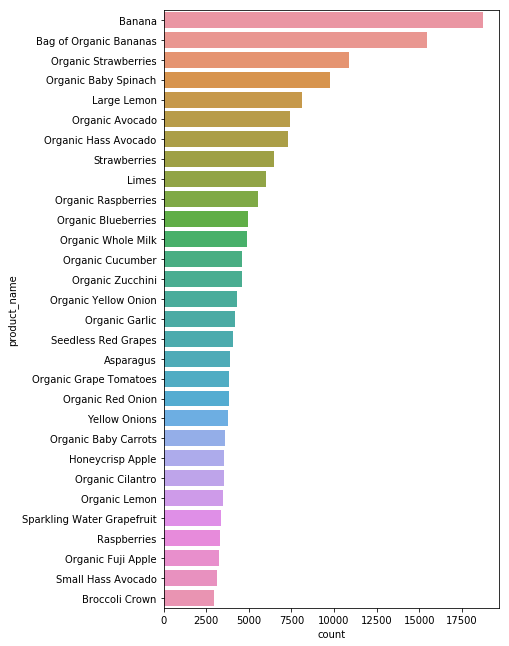

In [28]:
top_product_reorder = product_reorder.head(30)

plt.figure(figsize =(6, 11))
sns.barplot(data=top_product_reorder, x ="count", y =top_product_reorder.index, orient='h')

In [29]:
#재구매와 시간대 
hour_reorder = pd.pivot_table(train_order, 
               index = "order_hour_of_day",
              values = "reordered",
               aggfunc = ['sum','count','mean'])

hour_reorder

,sum,count,mean
,reordered,reordered,reordered
order_hour_of_day,,,
0,5188,9083,0.571177
1,3260,5626,0.579453
2,1870,3226,0.579665
3,1418,2438,0.581624
4,1454,2431,0.598108
5,2396,3847,0.622823
6,7708,11847,0.650629
7,23578,36302,0.649496


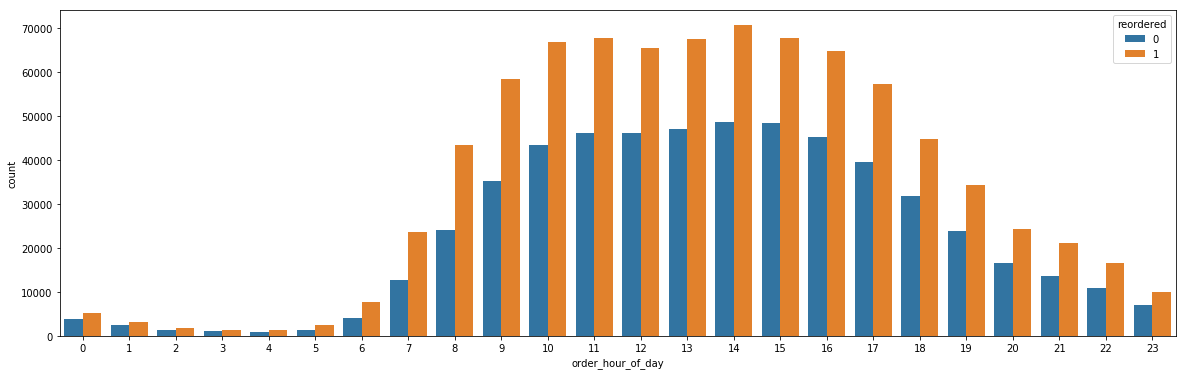

In [30]:
#새벽3시를 제외하면 모든 시간대가 재구매율이 높다. 
plt.figure(figsize=(20,6))
sns.countplot(x="order_hour_of_day", hue = "reordered", data=train_order)
plt.show()

In [31]:
#user_id와 재구매. 
#유저아이디는 고객이고, 고객별 재구매 횟수 누적... 인건가?? 
#user_id의 sum과 count가 뭘 의미하는지 좀 더 생각해봐야겠다... 

user_reorder = pd.pivot_table(train_order, 
               index = "user_id",
              values = "reordered",
               aggfunc = ['sum','count','mean'])

user_reorder.columns = ['sum', 'count', 'mean']
user_reorder = user_reorder.sort_values(by="count", ascending = False)
user_reorder.head(20)

,sum,count,mean
user_id,,,
149753,65,80,0.812500
197541,48,80,0.600000
63458,40,77,0.519481
189951,50,76,0.657895
83993,61,76,0.802632
169647,63,75,0.840000
104741,54,74,0.729730
31611,36,74,0.486486
59321,9,72,0.125000


In [32]:
# add_to_cart_order(카트에 추가하는 순서)
# 카트에추가하는순서의 가지수는 80까지 있다. 

cart_reorder = pd.pivot_table(train_order, 
               index = "add_to_cart_order",
              values = "reordered",
               aggfunc = ['sum','count','mean'])

cart_reorder.head()

,sum,count,mean
,reordered,reordered,reordered
add_to_cart_order,,,
1,94817,131209,0.722641
2,86916,124364,0.698884
3,78150,116996,0.667972
4,70492,108963,0.646935
5,62744,100745,0.622800


In [33]:
cart_reorder.columns = ['sum', 'count', 'mean']
cart_reorder = cart_reorder.sort_values(by="mean", ascending = False)
cart_reorder

#역시 첫번째가 영향을 많이 준다-72퍼센트이상으로. 

,sum,count,mean
add_to_cart_order,,,
1,94817,131209,0.722641
72,7,10,0.700000
2,86916,124364,0.698884
3,78150,116996,0.667972
77,2,3,0.666667
4,70492,108963,0.646935
69,9,14,0.642857
74,5,8,0.625000
5,62744,100745,0.622800


In [34]:
#카트에 추가하는 순서가 1번인건? 

train_order_cart = train_order[train_order["add_to_cart_order"] == 1]


print(train_order_cart.shape)    
train_order_cart.head()

(131209, 16)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dow(day)
7,1,Chocolate Sandwich Cookies,61,19,273262,1,1,snacks,cookies cakes,66968,train,18,6,10,18.0,Friday
8,1,Chocolate Sandwich Cookies,61,19,298510,1,1,snacks,cookies cakes,54868,train,5,3,12,14.0,Tuesday
24,1,Chocolate Sandwich Cookies,61,19,963599,1,0,snacks,cookies cakes,113239,train,4,4,17,18.0,Wednesday
33,1,Chocolate Sandwich Cookies,61,19,1361808,1,1,snacks,cookies cakes,123469,train,5,4,9,12.0,Wednesday
37,1,Chocolate Sandwich Cookies,61,19,1627973,1,0,snacks,cookies cakes,177557,train,15,0,15,23.0,Saturday


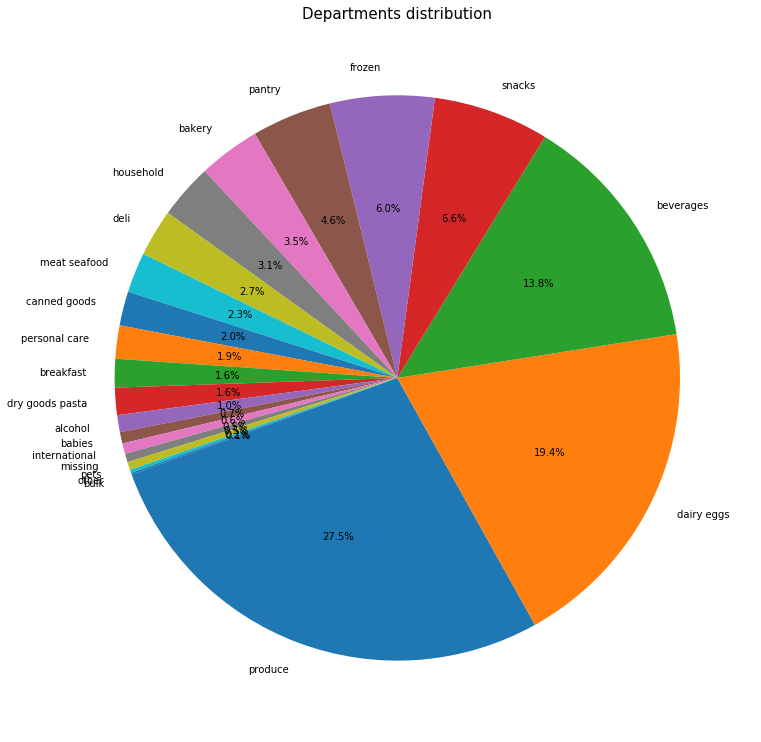

In [35]:
#카트 추가 1번으로 다시 확인해보기 -department 

plt.figure(figsize=(13,13))
temp_series = train_order_cart['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [36]:
#카트1, aisle, 재구매
#train에서도 일단 1위 제품은 milk임

cart_aisle_reorder = pd.pivot_table(train_order_cart, 
               index = "aisle",
              values = "reordered",
               aggfunc = ['sum','count', 'mean'])

cart_aisle_reorder.columns = ['sum', 'count', 'mean']
cart_aisle_reorder = cart_aisle_reorder.sort_values(by="mean", ascending = False)

cart_aisle_reorder.head(20)

,sum,count,mean
aisle,,,
milk,6375,7176,0.888378
fresh fruits,15841,18298,0.865723
water seltzer sparkling water,6410,7515,0.852961
trail mix snack mix,150,178,0.842697
packaged produce,1950,2326,0.838349
white wines,188,225,0.835556
yogurt,4155,5052,0.822447
baby accessories,26,32,0.812500
cream,1314,1628,0.807125


In [37]:
cart_product_reorder = pd.pivot_table(train_order_cart, 
               index = "product_name",
              values = "reordered",
               aggfunc = ['sum','count'])

cart_product_reorder.columns = ['sum', 'count']
cart_product_reorder = cart_product_reorder.sort_values(by="count", ascending = False)

cart_product_reorder.head(15)

#첫번째 카트에 담는 것을 베이스로 하고서, 재구매와 일반 데이터의 재구매 상품, depart, aisle 거의 비슷한 결과인 걸 알 수 있음 
#add_to_cart_order는 꼭 넣어야겠다. 

,sum,count
product_name,,
Banana,4376,4605
Bag of Organic Bananas,3610,3889
Organic Whole Milk,1041,1144
Organic Avocado,900,995
Organic Strawberries,761,900
Organic Baby Spinach,756,869
Organic Hass Avocado,691,797
Spring Water,669,730
Strawberries,599,707


In [38]:
#days_since_prior_order
#이전 주문으로부터 다시 주문 일순위는 30일, 7일이었는데 여기서는 순서가 뒤바뀌었다. 

cart_prior_reorder = pd.pivot_table(train_order_cart, 
               index = "days_since_prior_order",
              values = "reordered",
               aggfunc = ['sum','count', 'mean'])

cart_prior_reorder.columns = ['sum', 'count', 'mean']
cart_prior_reorder = cart_prior_reorder.sort_values(by="mean", ascending = False)

cart_prior_reorder

,sum,count,mean
days_since_prior_order,,,
7.0,7424,9154,0.811012
8.0,4217,5371,0.785142
0.0,1668,2126,0.784572
14.0,3541,4516,0.784101
6.0,4853,6207,0.781859
9.0,3024,3868,0.781799
15.0,2316,2975,0.778487
12.0,2331,3015,0.773134
11.0,2254,2927,0.770072


In [39]:
#feature 할 것 
feature_names = ["product_id", "aisle_id", "department_id", "add_to_cart_order", "order_dow(day)","days_since_prior_order", "order_hour_of_day", "reordered", "department"]

feature_names

#직관을 위해서 name이 있는 컬럼보다 id컬럼을 사용하기로 함. 
#order_id, user_id는 측정값을 확인해보고 추가를 결정 

['product_id',
 'aisle_id',
 'department_id',
 'add_to_cart_order',
 'order_dow(day)',
 'days_since_prior_order',
 'order_hour_of_day',
 'reordered',
 'department']

In [40]:
#orders에서 train, prior, test 추출하기. 
#test=submission과 같음. 
#train으로 -y_train 만들기. 